<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#
tc = pd.read_csv('C:/Users/iKerng/Python/School_DA/data/test_cluster.csv', delimiter=';')
# tc = pd.read_csv('data/test_cluster.csv', delimiter=';')
# tc2 = pd.read_csv('data/')

In [2]:
!CD C:/Users/iKerng/Python/School_DA

In [3]:
tc_income = tc[tc.income.notna() & tc.income != 0][['age', 'income', 'gender']]

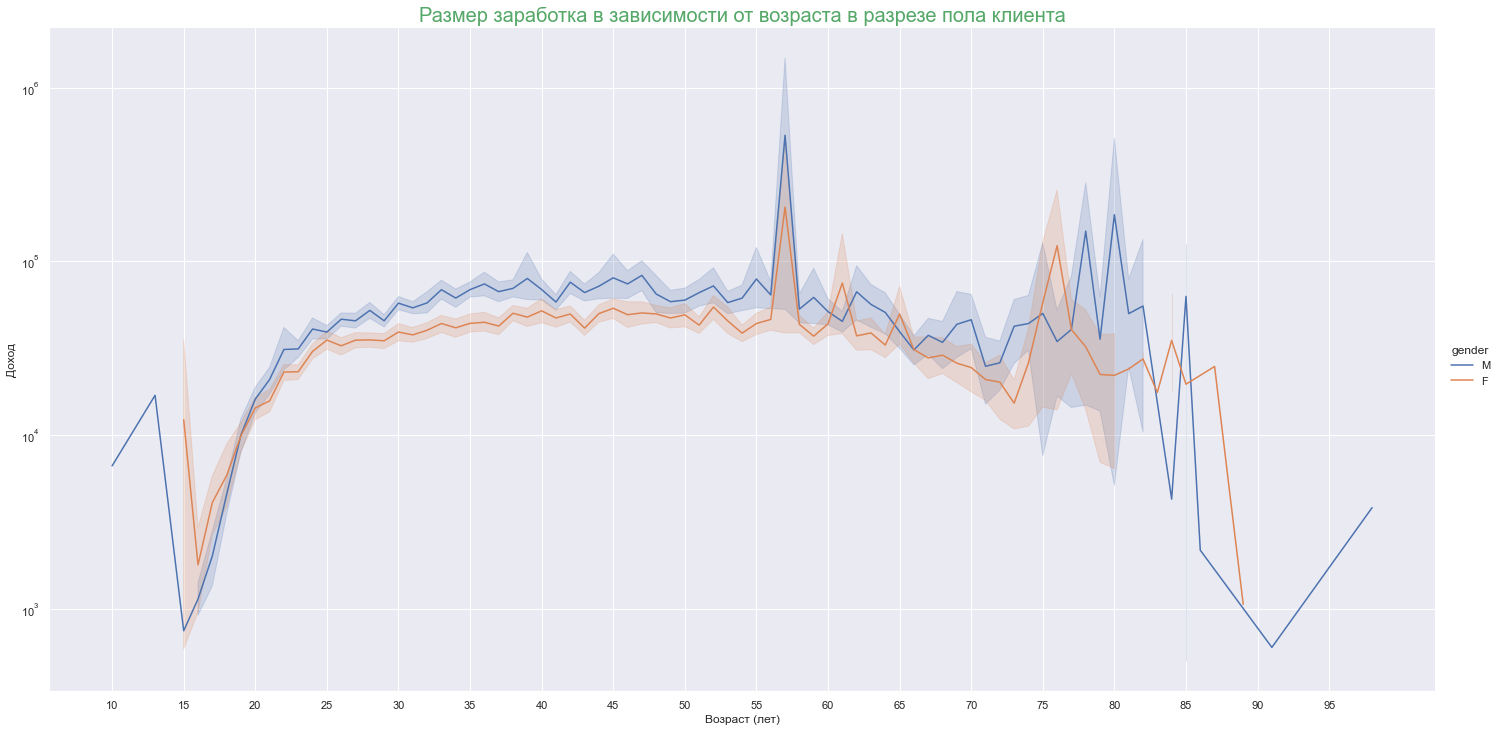

In [4]:
sns.set(style='darkgrid')
rp_line = sns.relplot(data=tc_income, x='age', y='income', hue='gender', kind='line', height=10, aspect=2)
rp_line.set(yscale='log')
rp_line.set_axis_labels('Возраст (лет)', 'Доход')
plt.xticks(range(min(tc_income.age), max(tc_income.age), 5))
plt.title('Размер заработка в зависимости от возраста в разрезе пола клиента', size=20, color='g')
plt.show()

In [5]:
city_type_order = ['<100', '100-500', '500-1000', '1M+', 'Mega']
tc_count_loan = tc[tc.loan_balance_0m != 0][['loan_balance_0m', 'gender', 'city_type']]
tc_count_loan_by_city = tc_count_loan.groupby(by=['city_type', 'gender']).count().rename(columns={
    'loan_balance_0m': 'loan_quantity'}).reset_index()

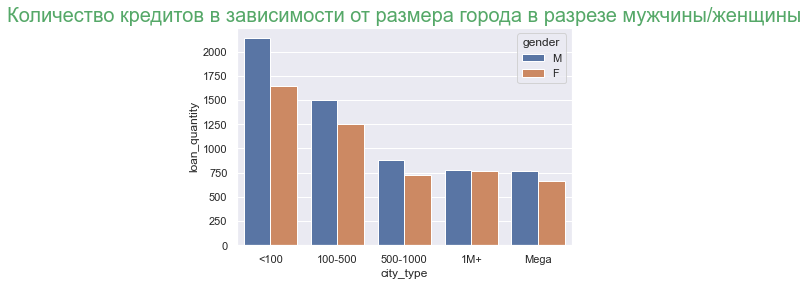

In [6]:
gender_order = ['М', 'F']

rp_barplt = sns.barplot(
    data=tc_count_loan_by_city,    
    x='city_type', y='loan_quantity',
    hue='gender',
    hue_order= gender_order,
    order=city_type_order,
)
plt.title('Количество кредитов в зависимости от размера города в разрезе мужчины/женщины', size=20, color='g')
plt.show()

In [7]:
def age_groups(age, sex):
    if (age >= 65 and sex == 'М') or (age >= 60 and sex == 'F'):
        return [6, 'Пенсионеры']
    elif age >= 45:
        return [5, 'Пожилые']
    elif age >= 36:
        return [4, 'Взрослые']
    elif age >= 25:
        return [3, 'Молодежь']
    elif age >= 18:
        return [2, 'Студенты']
    else:
        return [1, 'Несовершеннолетние']

tc_gender_age = tc[tc.gender.notna()].copy()
tc_gender_age['gender_age'] = tc_gender_age[['gender', 'age']].apply(lambda x: x.to_list(), axis=1)
tc_gender_age['age_group'] = tc_gender_age.gender_age.apply(lambda x: age_groups(x[1], x[0])[0])
tc_gender_age['desc_age_group'] = tc_gender_age.gender_age.apply(lambda x: age_groups(x[1], x[0])[1])
# tc_gender_age

In [13]:
desc_age_group_order = ['Несовершеннолетние', 'Студенты', 'Молодежь', 'Взрослые', 'Пожилые', 'Пенсионеры']
# tc_gender_age[tc_gender_age.income > 0][['income', 'desc_age_group', 'gender']]
df_catplot = tc_gender_age[tc_gender_age.income > 0][['income', 'desc_age_group', 'gender']]
# df_catplot

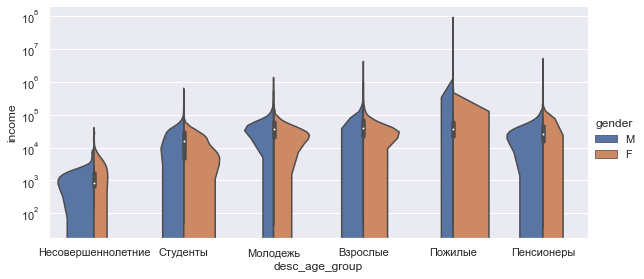

In [15]:
inc_catplot = sns.catplot(
    x='desc_age_group',
    y='income',
    data=df_catplot,
    kind='violin',
    hue='gender',
    order=desc_age_group_order,
    height=4,
    aspect=2,
    split=True
)
plt.yscale('log')
# plt.xscale('log')
plt.show()


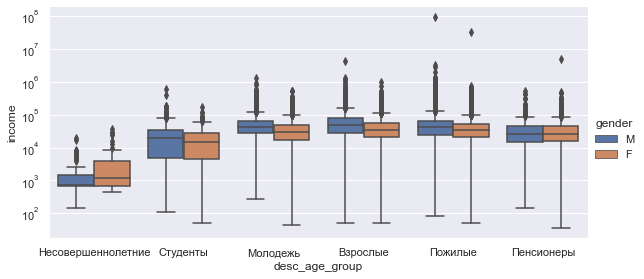

In [12]:
inc_catplot = sns.catplot(
    x='desc_age_group',
    y='income',
    data=df_catplot,
    kind='box',
    hue='gender',
    order=desc_age_group_order,
    height=4,
    aspect=2
)
plt.yscale('log')
# plt.xscale('log')
plt.show()



C:\Users\iKerng\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\iKerng\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\iKerng\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\iKerng\anaconda3\lib\site-packages\seaborn\d

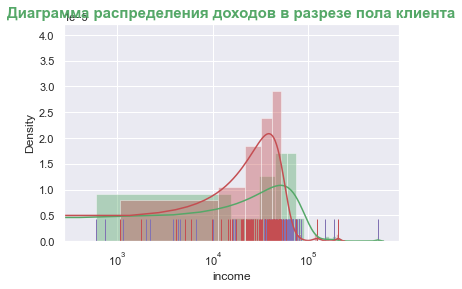

In [10]:
tc_group_gender_age = tc_gender_age[tc_gender_age.income > 0][['age', 'gender', 'income', 'desc_age_group']].\
    groupby(by=['age', 'gender', 'desc_age_group']).mean().reset_index()
tc_group_gender_age

sns.distplot(
    tc_group_gender_age[tc_group_gender_age.gender == 'М'].income,
    color='g',
    rug=True,
    rug_kws={"color": 'm', "height": 0.1}
)
sns.distplot(
    tc_group_gender_age[tc_group_gender_age.gender == 'F'].income,
    color='r',
    rug=True,
    rug_kws={"color": 'r', "height": 0.1}
)
plt.xscale('log')
plt.title('Диаграмма распределения доходов в разрезе пола клиента', size=15, color='g', weight='bold')
plt.show()

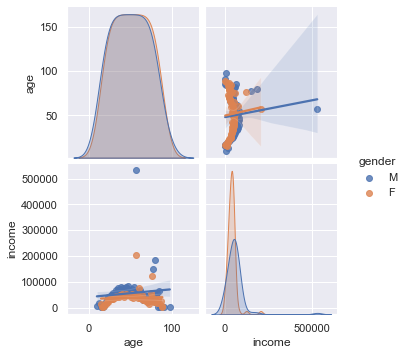

In [11]:
sns.pairplot(
    tc_group_gender_age,
    # tc_gender_2,
    # vars=['Coffee', 'Pies'],
    hue='gender',
    kind='reg')
# plt.yscale('log')
plt.show()